c:\Python\Python3.9.2\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


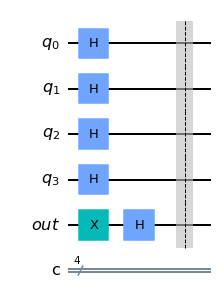

In [1]:
%matplotlib inline

from qiskit import *
from qiskit.visualization import *
from qiskit.tools.monitor import *

n = 4 # Number of qubits that we are going to use in the oracle

q   = QuantumRegister(n, 'q') # The oracle qubits
out = QuantumRegister(1, 'out') # Qubit for the oracle output
c   = ClassicalRegister(n, 'c') # Classical bits needed for the result of the measurement

circ_init = QuantumCircuit(q,out,c) # Initial part of the circuit

for i in range(n):    
    circ_init.h(q[i]) # We apply H to all the oracle qubits
    
circ_init.x(out)  # We apply X and H to the output qubit
circ_init.h(out)

circ_init.barrier() # Visual barrier to separate the parts of the circuit

circ_init.draw(output='mpl')

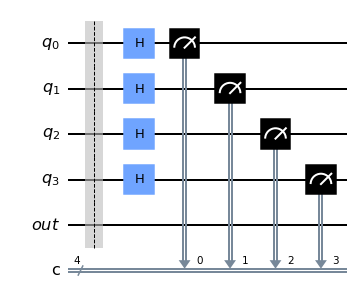

In [2]:
circ_end = QuantumCircuit(q,out,c)

circ_end.barrier() # Visual barrier to separate the parts of the circuit

for i in range(n):    
    circ_end.h(q[i]) # We apply H to all the oracle qubits
    
circ_end.measure(q,c)

circ_end.draw(output='mpl')

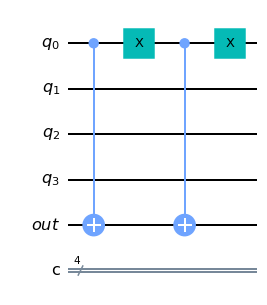

In [3]:
# Oracle for a boolean function that always returns 1 
    
const = QuantumCircuit(q,out,c)
const.cx(q[0],out)
const.x(q[0])
const.cx(q[0],out)
const.x(q[0])

const.draw(output='mpl')

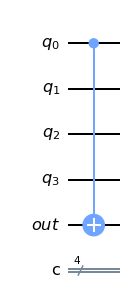

In [4]:
# Oracle for a boolean function that returns 1 for half of the inputs
    
bal = QuantumCircuit(q,out,c)
bal.cx(q[0],out)

bal.draw(output='mpl')

c:\Python\Python3.9.2\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


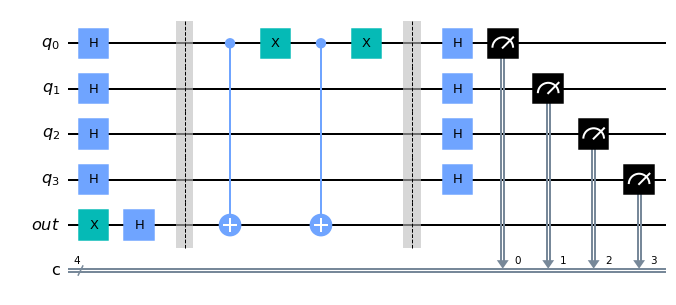

In [6]:
circ_const = circ_init & const & circ_end
circ_const.draw(output='mpl')

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(circ_const, backend, shots=10)
counts = job.result().get_counts()
print(counts)

{'0000': 10}


c:\Python\Python3.9.2\lib\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


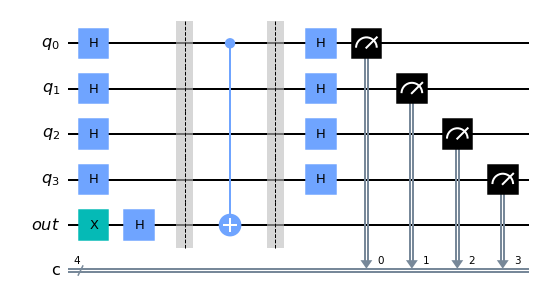

In [8]:
circ_bal = circ_init & bal & circ_end
circ_bal.draw(output='mpl')

In [9]:
job = execute(circ_bal, backend, shots=10)
counts = job.result().get_counts()
print(counts)

{'0001': 10}


In [10]:
from qiskit.providers.ibmq import least_busy

provider = IBMQ.load_account()
# We choose the least busy device
backend = least_busy(provider.backends(operational = True, simulator=False, status_msg='active',
                                       filters=lambda x: x.configuration().n_qubits >= n+1)) 
print("We are using...",backend)
print("It has",backend.status().pending_jobs,"pending jobs")
# We send both circuits at a time
circuits = [circ_const,circ_bal]
job_exp = execute(circuits, backend=backend)
job_monitor(job_exp)

C:\Users\rotht\AppData\Local\Temp/ipykernel_34880/605808196.py:3: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  provider = IBMQ.load_account()


We are using... ibm_osaka
It has 11 pending jobs
Job Status: job has successfully run


In [11]:
result_exp = job_exp.result()
counts_const = result_exp.get_counts(circ_const)
print("Results for the circuit with the constant function")
print(counts_const)
print()
counts_equi = result_exp.get_counts(circ_bal)
print("Results for the circuit with the balanced function")
print(counts_equi)

Results for the circuit with the constant function
{'1011': 7, '1001': 20, '0110': 16, '0100': 136, '0010': 168, '0000': 2711, '0011': 3, '1110': 25, '1010': 163, '1100': 108, '1101': 6, '1111': 1, '0101': 4, '1000': 518, '0001': 114}

Results for the circuit with the balanced function
{'1011': 7, '1001': 20, '0110': 16, '0100': 136, '0010': 168, '0000': 2711, '0011': 3, '1110': 25, '1010': 163, '1100': 108, '1101': 6, '1111': 1, '0101': 4, '1000': 518, '0001': 114}


c:\Python\Python3.9.2\lib\site-packages\qiskit\result\result.py:384: UserWarning: Result object contained multiple results matching name "circuit-152", only first match will be returned. Use an integer index to retrieve results for all entries.
  warnings.warn(
